In [1]:
# Add the project base directory to the path
import os
import sys

project_dir = os.path.abspath('../../')
sys.path.insert(0, project_dir)

# Import GUARD
from guard import world, analysis, parameters

In [2]:
# Set run parameters
params = parameters.defaults

years = ['1500BC', '1400BC', '1300BC', '1200BC', '1100BC', '1000BC', '900BC',
         '800BC', '700BC', '600BC', '500BC', '400BC', '300BC', '200BC',
         '100BC', '0', '100AD', '200AD', '300AD', '400AD', '500AD', '600AD',
         '700AD', '800AD', '900AD', '1000AD', '1100AD', '1200AD', '1300AD',
         '1400AD', '1500AD']

In [3]:
# Load old world map
map_ = world.World(params=params, from_file=project_dir+'/data/old_world.yml')



In [4]:
if os.path.isfile('./roman_polities.pkl'):
    roman_empire = analysis.CompareEmpireShape.from_file(
        map_, project_dir+'/data/roman_empire.yml', years,
        './roman_polities.pkl'
        )
else:
    # Load Roman empire historical extent
    roman_empire = analysis.CompareEmpireShape(
        map_,
        project_dir+'/data/roman_empire.yml',
        years
        )

    # Sample composition of polities in the Roman empire extent
    roman_empire.sample()
    for step in range(1500):
        map_.step()
        roman_empire.sample()
        if (map_.step_number) % 100 == 0:
            print('step: {:4d}'.format(map_.step_number))
    
    roman_empire.dump('./roman_polities.pkl')

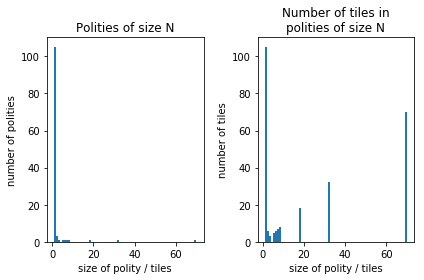

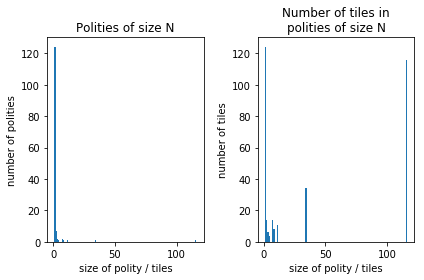

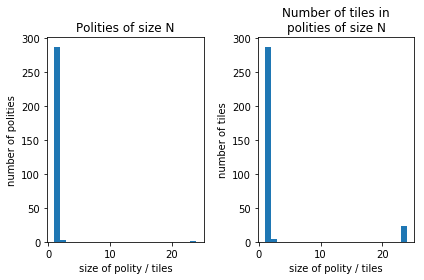

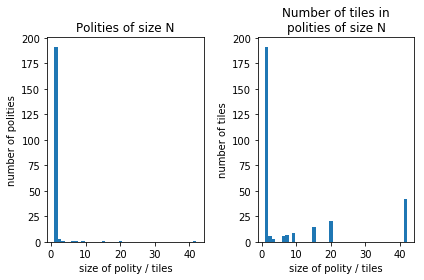

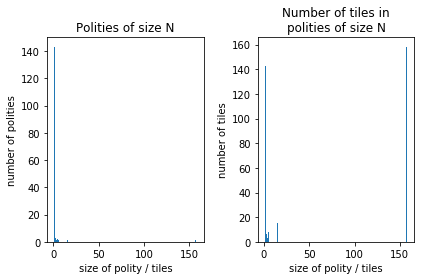

In [5]:
# Plot histograms
roman_empire.plot_histograms()